# Quantatitive Portfolio Analysis

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Josh Bond\Anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Data Cleaning

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum().sum()

4

In [5]:
# Drop nulls
whale_df = whale_df.dropna()

In [6]:
# Verify no null values
whale_df.isnull().sum().sum()

0

In [7]:
# Check column names
whale_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [8]:
# Rename the columns
whale_df = whale_df.rename(columns={"SOROS FUND MANAGEMENT LLC":"Soros Fund Mgmt", 
                                    "PAULSON & CO.INC. ": "Paulson & Co", 
                                    "TIGER GLOBAL MANAGEMENT LLC": "Tiger Global Mgmt", 
                                   "BERKSHIRE HATHAWAY INC": "Berkshire Hathaway"})
whale_df.head()

,Soros Fund Mgmt,Paulson & Co,Tiger Global Mgmt,Berkshire Hathaway
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_df.isnull().sum().sum()

6

In [11]:
# Drop nulls
algo_df = algo_df.dropna()

In [12]:
# Verify no null values
algo_df.isnull().sum().sum()

0

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [14]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","")
sp500_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
2012-10-08    1455.88
2012-10-09    1441.48
2012-10-10    1432.56
2012-10-11    1432.84
2012-10-12    1428.59
2012-10-15    1440.13
2012-10-16    1454.92
2012-10-17    1460.91
2012-10-18    1457.34
2012-10-19    1433.19
2012-10-22    1433.82
2012-10-23    1413.11
2012-10-24    1408.75
2012-10-25    1412.97
2012-10-26    1411.94
2012-10-31    1412.16
2012-11-01    1427.59
2012-11-02    1414.20
2012-11-05    1417.26
2012-11-06    1428.39
2012-11-07    1394.53
2012-11-08    1377.51
2012-11-09    1379.85
2012-11-12    1380.03
2012-11-13    1374.53
               ...   
2019-03-12    2791.52
2019-03-13    2810.92
2019-03-14    2808.48
2019-03-15    2822.48
2019-03-18    2832.94
2019-03-19    2832.57
2019-03-20    2824.23
2019-03-21    2854.88
2019-03-22    2800.71
2019-03-25    2798.36
2019-03-26    2818.46
2019-03-27    2805.37
2019-03-28    2815.44
2019-03-29    2834.40
2019-

In [16]:
# Verify Data Types are correct
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [17]:
# Calculate Daily Returns
sp500_dailyreturns = sp500_df.pct_change()
sp500_dailyreturns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Drop nulls
sp500_dailyreturns = sp500_dailyreturns.dropna()
sp500_dailyreturns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dailyreturns = sp500_dailyreturns.rename(columns={"Close":"SP500_Returns"})
sp500_dailyreturns.head()

,SP500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_dailyreturns], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,Soros Fund Mgmt,Paulson & Co,Tiger Global Mgmt,Berkshire Hathaway,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

## Performance Anlysis

#### Calculate and Plot the daily returns.


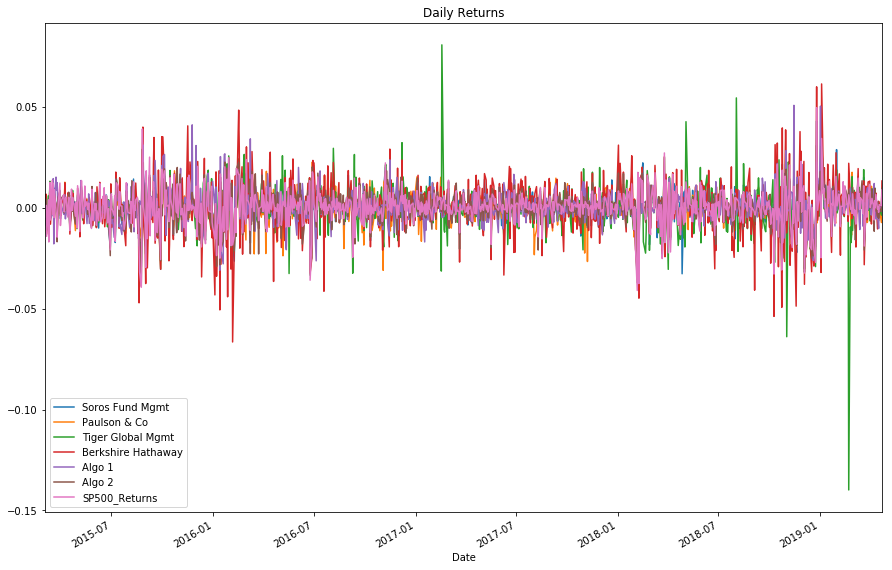

In [21]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10), title="Daily Returns");

#### Calculate and Plot cumulative returns.

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()
cumulative_returns.head()

,Soros Fund Mgmt,Paulson & Co,Tiger Global Mgmt,Berkshire Hathaway,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


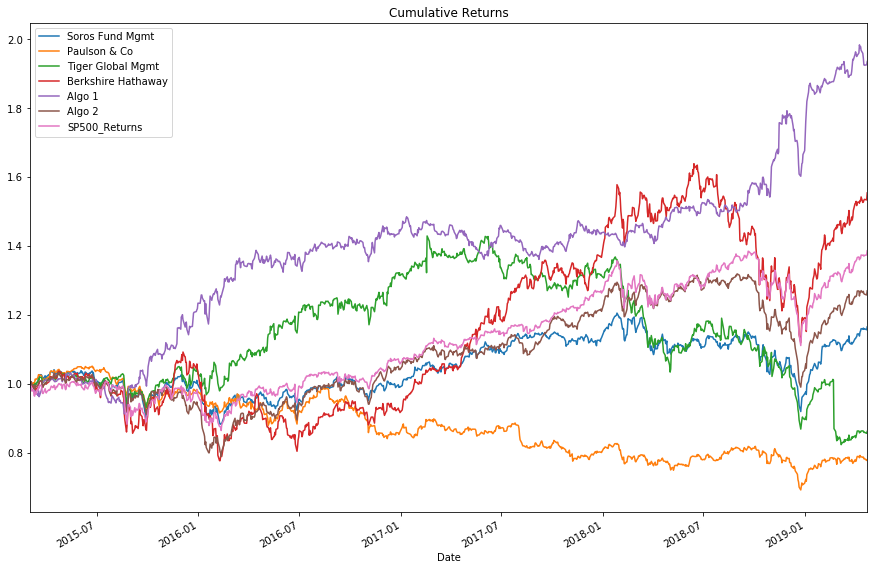

In [23]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns");

---

## Risk Analysis

### Create a box plot for each portfolio. 


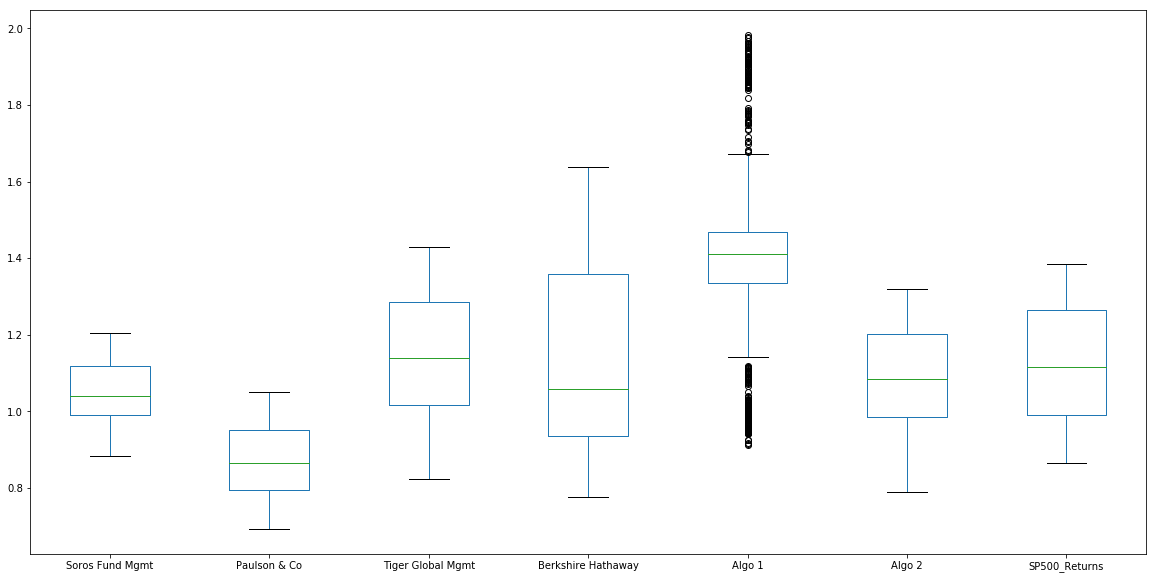

In [24]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10));

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.sort_values(inplace=True)
daily_std

Paulson & Co          0.007023
Algo 1                0.007620
Soros Fund Mgmt       0.007895
Algo 2                0.008342
SP500_Returns         0.008554
Tiger Global Mgmt     0.010894
Berkshire Hathaway    0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500
The Tiger Global Management and Berkshire Hathaway Inc portfolios are risker than the S&P 500 due to the fact that their standard deviations of 0.010894 and 0.012919, respectively, are higher than 0.008554 for the S&P 500. 

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df.std()*np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std

Paulson & Co          0.111488
Algo 1                0.120967
Soros Fund Mgmt       0.125335
Algo 2                0.132430
SP500_Returns         0.135786
Tiger Global Mgmt     0.172936
Berkshire Hathaway    0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

### Calculate and plot rolling `std` for all portfolios with 21-day window

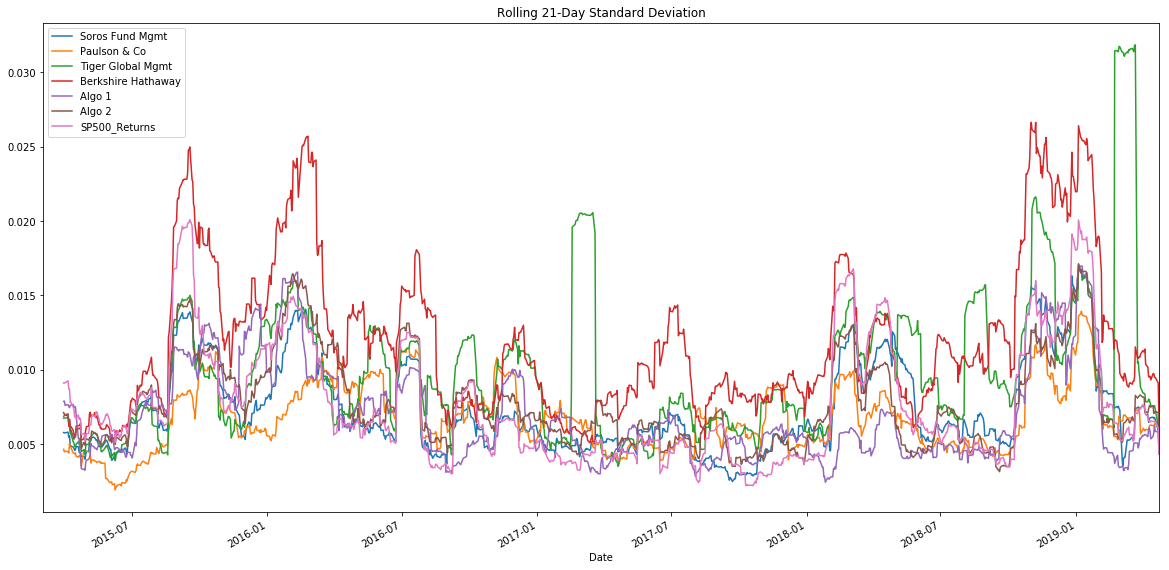

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling21 = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
all_rolling21.plot(figsize=(20,10), title="Rolling 21-Day Standard Deviation");

### Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500

In [28]:
# Calculate the correlation
combined_corr = combined_df.corr()
combined_corr

,Soros Fund Mgmt,Paulson & Co,Tiger Global Mgmt,Berkshire Hathaway,Algo 1,Algo 2,SP500_Returns
Soros Fund Mgmt,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson & Co,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger Global Mgmt,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
Berkshire Hathaway,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500_Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


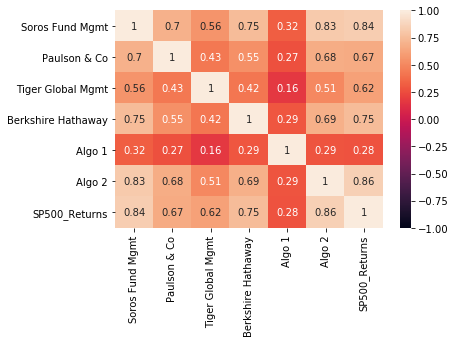

In [29]:
# Display de correlation matrix
sns.heatmap(combined_corr, vmin=-1, vmax=1, annot=True);

### Calculate and Plot 60-Day Rolling Beta for a chosen portfolio and the S&P 500

In [30]:
# Calculate covariance of a single portfolio
soros_rolling_cov = combined_df['Soros Fund Mgmt'].rolling(window=60).cov(combined_df['SP500_Returns'])
soros_rolling_cov

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
                ...   
2019-03-12    0.000121
2019-03-13    0.000121
2019-03-14    0.000118
2019-03-15    0.000109
2019-03-18    0.000109
2019-03-19    0.000104
2019-03-20    0.000099
2019-03-21    0.000090
2019-03-22    0.000087
2019-03-25    0.000055
2019-03-26    0.000055
2019-03-27    0.000056
2019-0

In [31]:
# Calculate variance of S&P 500
rolling_variance = combined_df['SP500_Returns'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
                ...   
2019-03-12    0.000152
2019-03-13    0.000152
2019-03-14    0.000145
2019-03-15    0.000137
2019-03-18    0.000137
2019-03-19    0.000132
2019-03-20    0.000127
2019-03-21    0.000119
2019-03-22    0.000112
2019-03-25    0.000074
2019-03-26    0.000074
2019-03-27    0.000075
2019-0

In [32]:
# Computing beta
soros_rolling_beta = soros_rolling_cov / rolling_variance
soros_rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
                ...   
2019-03-12    0.795692
2019-03-13    0.792505
2019-03-14    0.809704
2019-03-15    0.798490
2019-03-18    0.798334
2019-03-19    0.786875
2019-03-20    0.776839
2019-03-21    0.758104
2019-03-22    0.773997
2019-03-25    0.737951
2019-03-26    0.740347
2019-03-27    0.743499
2019-0

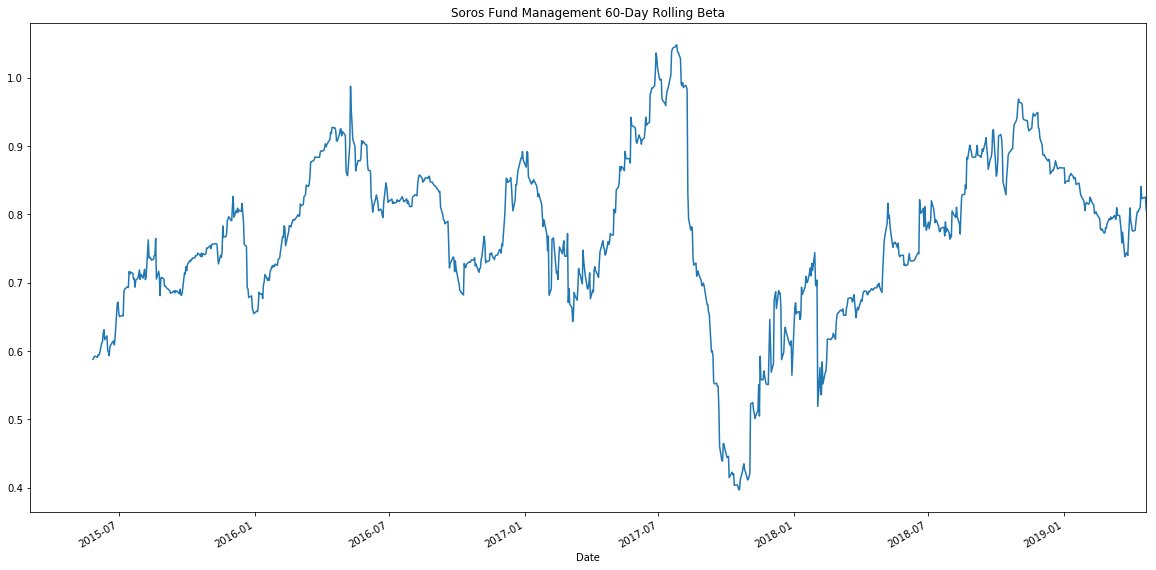

In [33]:
# Plot beta trend
soros_rolling_beta.plot(figsize=(20,10), title='Soros Fund Management 60-Day Rolling Beta');

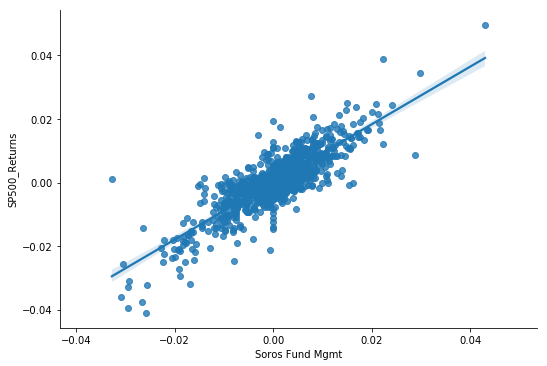

In [34]:
#Soros Fund Management Beta vs. Correlation scatterplot comparison
sns.lmplot(x='Soros Fund Mgmt', y='SP500_Returns', data=combined_df, aspect=1.5, fit_reg=True);

### Calculate the exponentially weighted moving average (`ewm`) with a 21-day half-life

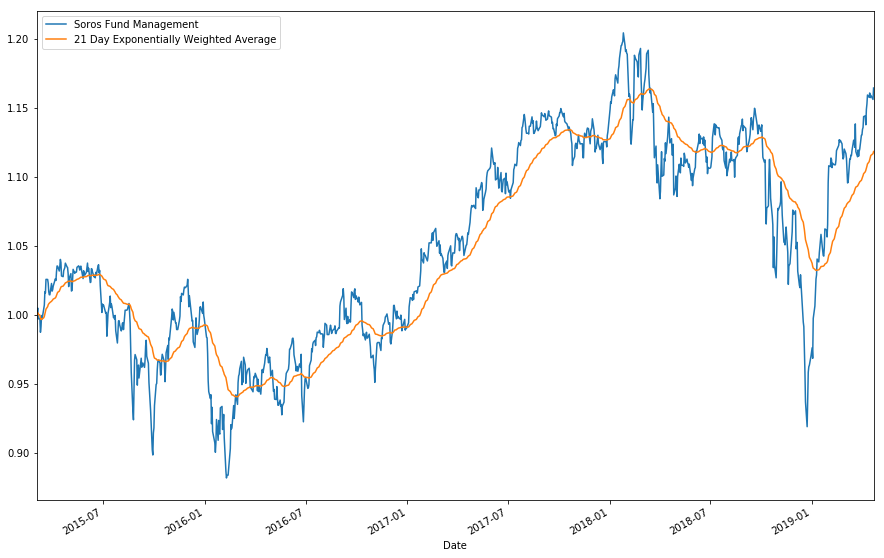

In [35]:
# Use `ewm` to calculate and plot the rolling window
ax = cumulative_returns['Soros Fund Mgmt'].plot()
cumulative_returns['Soros Fund Mgmt'].ewm(halflife=21).mean().plot(figsize=(15,10)) 
ax.legend(["Soros Fund Management", "21 Day Exponentially Weighted Average"]);


---

# Sharpe Ratios

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios
annual_sharperatio = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252))
annual_sharperatio

Soros Fund Mgmt       0.356417
Paulson & Co         -0.483570
Tiger Global Mgmt    -0.121060
Berkshire Hathaway    0.621810
Algo 1                1.378648
Algo 2                0.501364
SP500_Returns         0.648267
dtype: float64

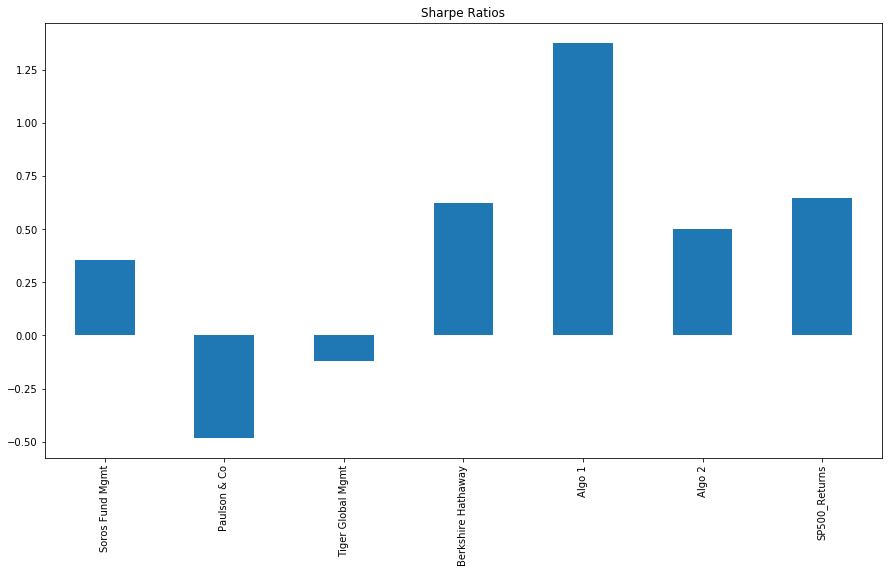

In [37]:
# Visualize the sharpe ratios as a bar plot
annual_sharperatio.plot.bar(title='Sharpe Ratios', figsize=(15,8));

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.


Algorithmic strategy 1 (Algo 1) outperformed the market, as well as all of the whale's portfolios, in terms of cumulative returns while also having a much higher sharpe ratio. Meaning that Algo 1 has considerably better risk-adjusted-performance compared to the other portfolios. In addition, the annual standard deviation (volatility) for Algo 1 was lower than the market and most other portfolios. Algorithmic strategy 2 (Algo 2) outperformed Soros Fund Management, Paulson & Co., and Tiger Global Management. However, Algo 2 failed to outperform Berkshire Hathaway and the market.

---

# Custom Portfolio

For this custom portfolio, I used used data from three companies listed in the S&P 500 index.

* `TSM` - [Taiwan Semiconductor Manufacturing Company, Limited](https://en.wikipedia.org/wiki/TSMC)

* `AMD` - [Advanced Micro Devices, Inc.](https://en.wikipedia.org/wiki/Advanced_Micro_Devices)

* `DIS` - [Disney](https://en.wikipedia.org/wiki/The_Walt_Disney_Company)

In [42]:
# Reading data from TSM stock
tsm_data = Path("Resources/tsm_data.csv")
tsm_df = pd.read_csv(tsm_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsm_df.sort_index(inplace=True)
tsm_df.index=tsm_df.index.date
tsm_df.head()

,Close
2010-01-04,11.58
2010-01-05,11.53
2010-01-06,11.49
2010-01-07,11.11
2010-01-08,11.10


In [43]:
# Reading data from AMD stock
amd_data = Path("Resources/amd_data.csv")
amd_df = pd.read_csv(amd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
amd_df.sort_index(inplace=True)
amd_df.index=amd_df.index.date
amd_df.head()

,Close
2010-01-04,9.70
2010-01-05,9.71
2010-01-06,9.57
2010-01-07,9.47
2010-01-08,9.43


In [44]:
# Reading data from DIS stock
dis_data = Path("Resources/dis_data.csv")
dis_df = pd.read_csv(dis_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
dis_df.sort_index(inplace=True)
dis_df.index=dis_df.index.date
dis_df.head()

,Close
2010-01-04,32.07
2010-01-05,31.99
2010-01-06,31.82
2010-01-07,31.83
2010-01-08,31.88


In [45]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([tsm_df, amd_df, dis_df], axis="columns", join='inner')
my_portfolio.sort_index(inplace=True)
my_portfolio.columns=['TSM', 'AMD', 'DIS']
my_portfolio.head()

,TSM,AMD,DIS
2010-01-04,11.58,9.70,32.07
2010-01-05,11.53,9.71,31.99
2010-01-06,11.49,9.57,31.82
2010-01-07,11.11,9.47,31.83
2010-01-08,11.10,9.43,31.88


In [46]:
# Calculate daily returns
my_daily_returns = my_portfolio.pct_change().dropna()

# Display sample data
my_daily_returns.head()

,TSM,AMD,DIS
2010-01-05,-0.004318,0.001031,-0.002495
2010-01-06,-0.003469,-0.014418,-0.005314
2010-01-07,-0.033072,-0.010449,0.000314
2010-01-08,-0.000900,-0.004224,0.001571
2010-01-11,-0.005405,-0.030753,-0.016311


### Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_daily_returns.dot(weights)

# Display sample data
my_portfolio_returns.head()

2010-01-05   -0.001927
2010-01-06   -0.007734
2010-01-07   -0.014402
2010-01-08   -0.001184
2010-01-11   -0.017490
dtype: float64

### Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
combined_df2 = pd.concat([combined_df, my_portfolio_returns], axis="columns", join="inner")
combined_df2.columns=["Soros Fund Mgmt","Paulson & Co","Tiger Global Mgmt","Berkshire Hathaway","Algo 1","Algo 2","SP500_Returns","My Portfolio"]
combined_df2.head()

,Soros Fund Mgmt,Paulson & Co,Tiger Global Mgmt,Berkshire Hathaway,Algo 1,Algo 2,SP500_Returns,My Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.007580
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.014312
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.007574
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015594
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.003091


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df2.isnull().sum().sum()

0

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
combined_std = combined_df2.std()*np.sqrt(252)
combined_std.sort_values(inplace=True)
combined_std

Paulson & Co          0.111488
Algo 1                0.120967
Soros Fund Mgmt       0.125335
Algo 2                0.132430
SP500_Returns         0.135786
Tiger Global Mgmt     0.172936
Berkshire Hathaway    0.205077
My Portfolio          0.282341
dtype: float64

### Calculate and plot rolling `std` with 21-day window

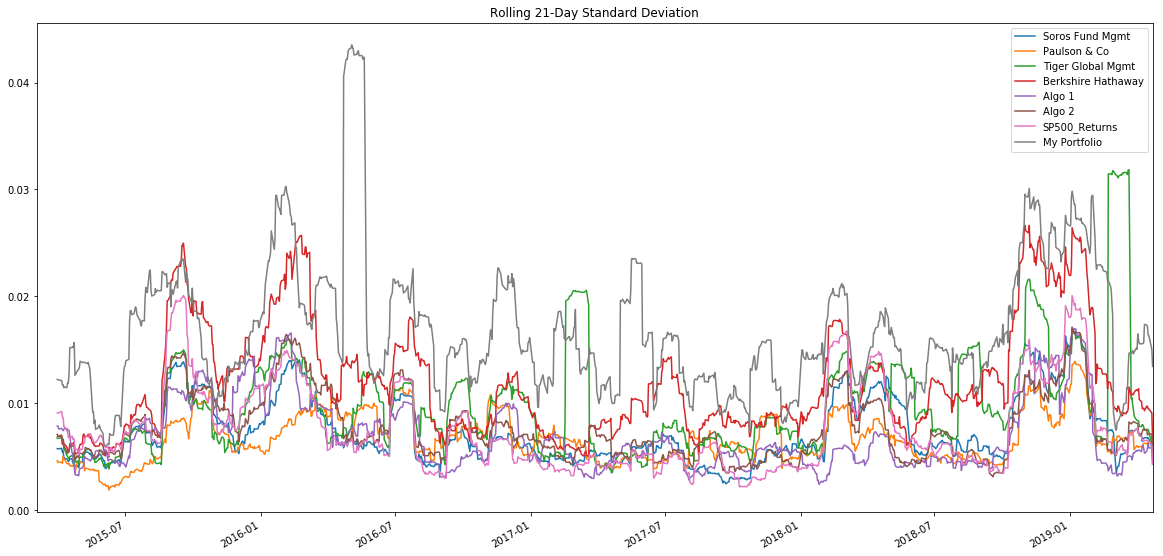

In [51]:
# Calculate rolling standard deviation
combined_rolling_std = combined_df2.rolling(window=21).std()
# Plot rolling standard deviation
combined_rolling_std.plot(figsize=(20,10), title="Rolling 21-Day Standard Deviation");

### Calculate and plot the correlation

In [52]:
# Calculate and plot the correlation
correlation = combined_df2.corr()
correlation

,Soros Fund Mgmt,Paulson & Co,Tiger Global Mgmt,Berkshire Hathaway,Algo 1,Algo 2,SP500_Returns,My Portfolio
Soros Fund Mgmt,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.567319
Paulson & Co,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.435831
Tiger Global Mgmt,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.361276
Berkshire Hathaway,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.533500
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.147554
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.573955
SP500_Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.598732
My Portfolio,0.567319,0.435831,0.361276,0.533500,0.147554,0.573955,0.598732,1.000000


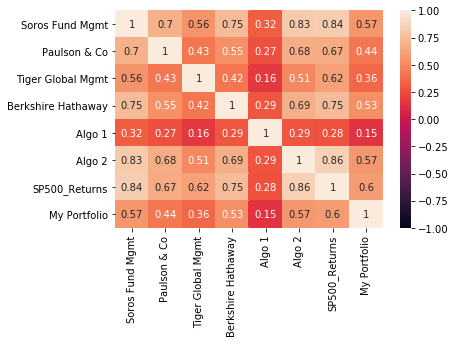

In [53]:
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True);

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

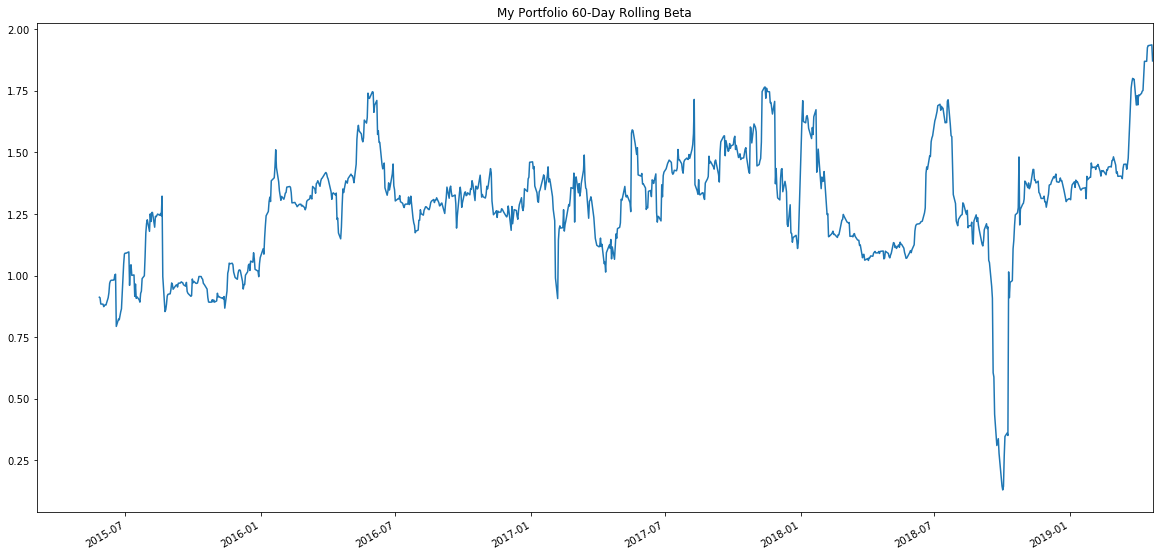

In [54]:
# Calculate and plot Beta
covariance = combined_df2['My Portfolio'].rolling(window=60).cov(combined_df2['SP500_Returns'])
variance = combined_df2['SP500_Returns'].rolling(window=60).var()
beta = covariance/variance

beta.plot(figsize=(20,10), title='My Portfolio 60-Day Rolling Beta');

In [55]:
beta.mean()

1.2796497338753305

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualzied Sharpe Ratios
sharperatio = (combined_df2.mean()*252)/(combined_df2.std()*np.sqrt(252))
sharperatio

Soros Fund Mgmt       0.356417
Paulson & Co         -0.483570
Tiger Global Mgmt    -0.121060
Berkshire Hathaway    0.621810
Algo 1                1.378648
Algo 2                0.501364
SP500_Returns         0.648267
My Portfolio          1.166021
dtype: float64

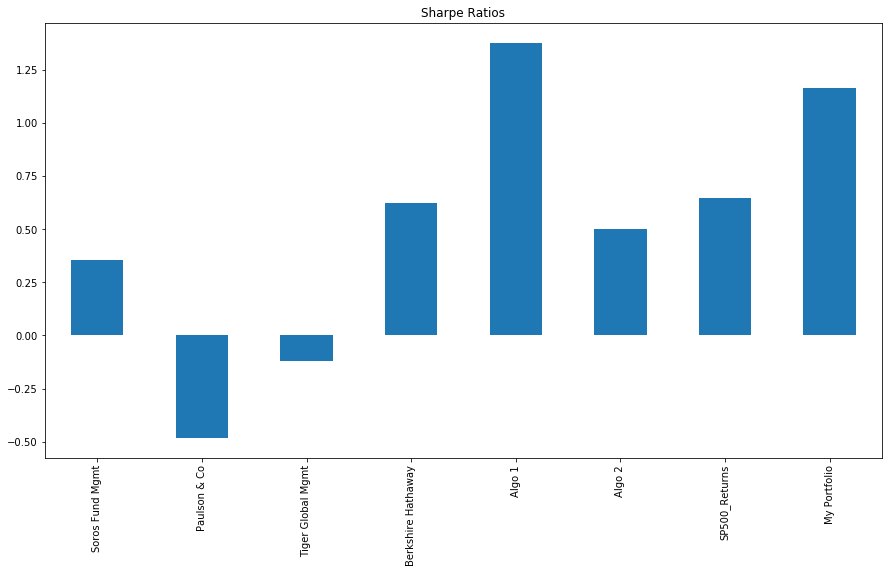

In [57]:
# Visualize the sharpe ratios as a bar plot
sharperatio.plot.bar(title='Sharpe Ratios', figsize=(15,8))

### How the custom portfolio perform?
My portfolio performs very well, outperforming all other portfolios except the Algo 1 portfolio in terms of risk-adjusted-performance (sharpe ratio). However, my portfolio's annual deviation (volatility) was higher than all other portfolios. It also has average beta of 1.279 indicating that it usually moves more than the market. 